Total rice grains detected: 190

Rice #1
  Area             : 338.0
  Perimeter        : 79.60
  Major Axis Length: 28.18

Rice #2
  Area             : 234.0
  Perimeter        : 63.36
  Major Axis Length: 26.21

Rice #3
  Area             : 848.0
  Perimeter        : 180.13
  Major Axis Length: 58.41

Rice #4
  Area             : 288.0
  Perimeter        : 86.25
  Major Axis Length: 27.33

Rice #5
  Area             : 586.0
  Perimeter        : 137.71
  Major Axis Length: 42.49

Rice #6
  Area             : 216.0
  Perimeter        : 61.21
  Major Axis Length: 18.14

Rice #7
  Area             : 232.0
  Perimeter        : 71.73
  Major Axis Length: 27.84

Rice #8
  Area             : 320.0
  Perimeter        : 127.50
  Major Axis Length: 62.50

Rice #9
  Area             : 1426.0
  Perimeter        : 263.48
  Major Axis Length: 104.81

Rice #10
  Area             : 427.0
  Perimeter        : 116.08
  Major Axis Length: 49.37

Rice #11
  Area             : 350.0
  Perimeter        : 74

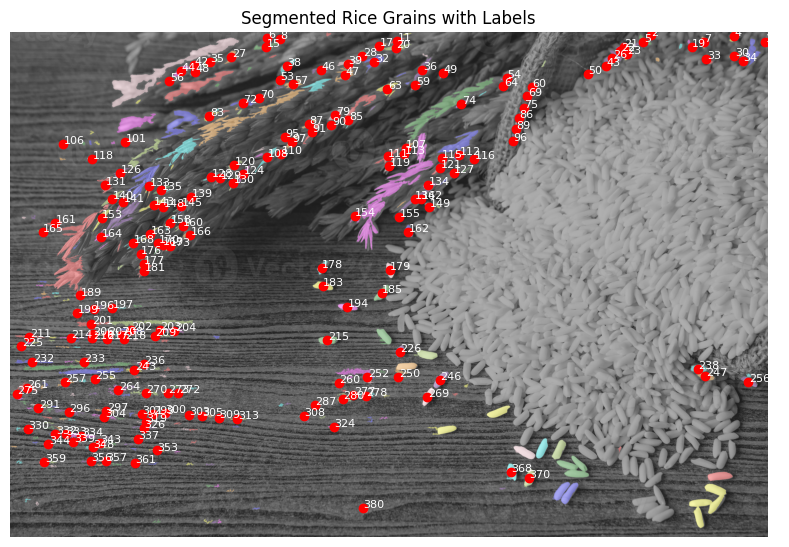

In [1]:
import matplotlib.pyplot as plt
from skimage import io, filters, measure, morphology, color
from skimage.measure import regionprops
from skimage.segmentation import clear_border

# Load rice image (grayscale)
image = io.imread("stdimgs/rice2.jpg", as_gray=True)

# Apply global threshold (Otsu)
threshold = filters.threshold_otsu(image)
binary = image > threshold

# Clean up borders and small holes
cleaned = morphology.remove_small_objects(binary, min_size=100)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=100)
cleaned = clear_border(cleaned)

# Label connected regions
labeled_image = measure.label(cleaned)
regions = regionprops(labeled_image)

# Filter by area range (e.g. 200–2000 pixels)
filtered_regions = [r for r in regions if 200 <= r.area <= 2000]

# Display information
print(f"Total rice grains detected: {len(filtered_regions)}\n")
for i, region in enumerate(filtered_regions, 1):
    print(f"Rice #{i}")
    print(f"  Area             : {region.area}")
    print(f"  Perimeter        : {region.perimeter:.2f}")
    print(f"  Major Axis Length: {region.major_axis_length:.2f}")
    print()

# Visualize with labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(color.label2rgb(labeled_image, image=image, bg_label=0), cmap="gray")

for region in filtered_regions:
    y, x = region.centroid
    ax.plot(x, y, "ro")
    ax.text(x + 2, y, str(region.label), color="white", fontsize=8)

plt.title("Segmented Rice Grains with Labels")
plt.axis("off")
plt.tight_layout()
plt.show()